In [1]:
import pandas as pd
from sqlalchemy import create_engine
import matplotlib.pyplot as plt
import numpy as np

## Extract Population 2018-2019 data into DataFrame

In [2]:
# Read CSV
df = pd.read_csv('2- CSV/Original_CSV/32180ds0001_2018-19.csv')
df.head()

,Australian Bureau of Statistics,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,...,Unnamed: 13,Unnamed: 14,Unnamed: 15,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20,Unnamed: 21,Unnamed: 22
0,"3218.0 Regional Population Growth, Australia",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Released at 11.30am (Canberra time) 25 March 2020,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,"Table 2. Estimated Resident Population, Statis...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,ERP change,NaN,NaN,Components of population change 2018-19,NaN,NaN,NaN,NaN,NaN,NaN


## Transformation of dataframe

In [3]:
#Identifying the row containing the column names - row index 6:
df.iloc[6]

            Australian Bureau of Statistics       S/T code
Unnamed: 1                                        S/T name
Unnamed: 2                                      GCCSA code
Unnamed: 3                                      GCCSA name
Unnamed: 4                                        SA4 code
Unnamed: 5                                        SA4 name
Unnamed: 6                                        SA3 code
Unnamed: 7                                        SA3 name
Unnamed: 8                                        SA2 code
Unnamed: 9                                        SA2 name
Unnamed: 10                                            no.
Unnamed: 11                                            no.
Unnamed: 12                                            NaN
Unnamed: 13                                            no.
Unnamed: 14                                              %
Unnamed: 15                                            NaN
Unnamed: 16                                            n

In [4]:
#Renaming some column names via iloc as there are too many columns titled "no."
df.iloc[6,10]= 'Population_2018'
df.iloc[6,11]='Population_2019'
df.iloc[6,13]='Population_growth'
df.iloc[6,16]='Natural Increase'
df.iloc[6,17]='Net Internal Migration'
df.iloc[6,18]='Net Overseas Migration'

In [5]:
#Checking data has been replaced
df.iloc[6]

            Australian Bureau of Statistics                  S/T code
Unnamed: 1                                                   S/T name
Unnamed: 2                                                 GCCSA code
Unnamed: 3                                                 GCCSA name
Unnamed: 4                                                   SA4 code
Unnamed: 5                                                   SA4 name
Unnamed: 6                                                   SA3 code
Unnamed: 7                                                   SA3 name
Unnamed: 8                                                   SA2 code
Unnamed: 9                                                   SA2 name
Unnamed: 10                                           Population_2018
Unnamed: 11                                           Population_2019
Unnamed: 12                                                       NaN
Unnamed: 13                                         Population_growth
Unnamed: 14         

In [6]:
#Assigning the row 6 as header:
df.columns = df.iloc[6]
df.head(10)

6,S/T code,S/T name,GCCSA code,GCCSA name,SA4 code,SA4 name,SA3 code,SA3 name,SA2 code,SA2 name,...,Population_growth,%,NaN,Natural Increase,Net Internal Migration,Net Overseas Migration,NaN,km2,persons/km2,NaN
0,"3218.0 Regional Population Growth, Australia",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Released at 11.30am (Canberra time) 25 March 2020,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,"Table 2. Estimated Resident Population, Statis...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,ERP change,NaN,NaN,Components of population change 2018-19,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,2018-2019,NaN,NaN,Natural increase,Net internal migration,Net overseas migration,NaN,Area,Population density 2019,NaN
6,S/T code,S/T name,GCCSA code,GCCSA name,SA4 code,SA4 name,SA3 code,SA3 name,SA2 code,SA2 name,...,Population_growth,%,NaN,Natural Increase,Net Internal Migration,Net Overseas Migration,NaN,km2,persons/km2,NaN
7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,2,Victoria,2RVIC,Rest of Vic.,201,Ballarat,20101,Ballarat,201011001,Alfredton,...,778,5.9,NaN,127,582,69,NaN,52.7,266.9,NaN
9,2,Victoria,2RVIC,Rest of Vic.,201,Ballarat,20101,Ballarat,201011002,Ballarat,...,50,0.4,NaN,-33,-2,85,NaN,12.4,987.6,NaN


In [7]:
#Dropping all unnessary rows:
new_df = df.iloc[8:470,:]
#Reset the index:
df2 = new_df.reset_index(drop=True)
df2

6,S/T code,S/T name,GCCSA code,GCCSA name,SA4 code,SA4 name,SA3 code,SA3 name,SA2 code,SA2 name,...,Population_growth,%,NaN,Natural Increase,Net Internal Migration,Net Overseas Migration,NaN,km2,persons/km2,NaN
0,2,Victoria,2RVIC,Rest of Vic.,201,Ballarat,20101,Ballarat,201011001,Alfredton,...,778,5.9,NaN,127,582,69,NaN,52.7,266.9,NaN
1,2,Victoria,2RVIC,Rest of Vic.,201,Ballarat,20101,Ballarat,201011002,Ballarat,...,50,0.4,NaN,-33,-2,85,NaN,12.4,987.6,NaN
2,2,Victoria,2RVIC,Rest of Vic.,201,Ballarat,20101,Ballarat,201011003,Ballarat - North,...,310,1.3,NaN,83,134,93,NaN,92.4,264.8,NaN
3,2,Victoria,2RVIC,Rest of Vic.,201,Ballarat,20101,Ballarat,201011004,Ballarat - South,...,204,0.8,NaN,109,-58,153,NaN,32.9,779.0,NaN
4,2,Victoria,2RVIC,Rest of Vic.,201,Ballarat,20101,Ballarat,201011005,Buninyong,...,128,1.7,NaN,33,49,46,NaN,51.6,149.5,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
457,2,Victoria,2RVIC,Rest of Vic.,217,Warrnambool and South West,21703,Colac - Corangamite,217031476,Otway,...,29,0.8,NaN,-1,-4,34,NaN,1505.9,2.4,NaN
458,2,Victoria,2RVIC,Rest of Vic.,217,Warrnambool and South West,21704,Warrnambool,217041477,Moyne - East,...,16,0.2,NaN,25,-29,20,NaN,3275.8,2.0,NaN
459,2,Victoria,2RVIC,Rest of Vic.,217,Warrnambool and South West,21704,Warrnambool,217041478,Moyne - West,...,65,0.7,NaN,24,-4,45,NaN,2037.8,4.8,NaN
460,2,Victoria,2RVIC,Rest of Vic.,217,Warrnambool and South West,21704,Warrnambool,217041479,Warrnambool - North,...,253,1.2,NaN,93,1,159,NaN,62.4,356.1,NaN


In [8]:
#Renaming the column names:
df2.rename(columns = {
                      'km2':'Area(km2)',
                      'persons/km2':'Population Density 2019 (persons/km2)'
                     }, 
           inplace = True) 
df2.head()

6,S/T code,S/T name,GCCSA code,GCCSA name,SA4 code,SA4 name,SA3 code,SA3 name,SA2 code,SA2 name,...,Population_growth,%,NaN,Natural Increase,Net Internal Migration,Net Overseas Migration,NaN,Area(km2),Population Density 2019 (persons/km2),NaN
0,2,Victoria,2RVIC,Rest of Vic.,201,Ballarat,20101,Ballarat,201011001,Alfredton,...,778,5.9,NaN,127,582,69,NaN,52.7,266.9,NaN
1,2,Victoria,2RVIC,Rest of Vic.,201,Ballarat,20101,Ballarat,201011002,Ballarat,...,50,0.4,NaN,-33,-2,85,NaN,12.4,987.6,NaN
2,2,Victoria,2RVIC,Rest of Vic.,201,Ballarat,20101,Ballarat,201011003,Ballarat - North,...,310,1.3,NaN,83,134,93,NaN,92.4,264.8,NaN
3,2,Victoria,2RVIC,Rest of Vic.,201,Ballarat,20101,Ballarat,201011004,Ballarat - South,...,204,0.8,NaN,109,-58,153,NaN,32.9,779.0,NaN
4,2,Victoria,2RVIC,Rest of Vic.,201,Ballarat,20101,Ballarat,201011005,Buninyong,...,128,1.7,NaN,33,49,46,NaN,51.6,149.5,NaN


In [9]:
#Selecting columns needed:
df3 = df2[['SA4 code','SA4 name','SA3 code','SA3 name','SA2 code','SA2 name',
          'Population_2018', 'Population_2019', "Natural Increase","Net Internal Migration", 'Net Overseas Migration',
          'Area(km2)','Population Density 2019 (persons/km2)']]
df3.head()

6,SA4 code,SA4 name,SA3 code,SA3 name,SA2 code,SA2 name,Population_2018,Population_2019,Natural Increase,Net Internal Migration,Net Overseas Migration,Area(km2),Population Density 2019 (persons/km2)
0,201,Ballarat,20101,Ballarat,201011001,Alfredton,13291,14069,127,582,69,52.7,266.9
1,201,Ballarat,20101,Ballarat,201011002,Ballarat,12175,12225,-33,-2,85,12.4,987.6
2,201,Ballarat,20101,Ballarat,201011003,Ballarat - North,24147,24457,83,134,93,92.4,264.8
3,201,Ballarat,20101,Ballarat,201011004,Ballarat - South,25390,25594,109,-58,153,32.9,779.0
4,201,Ballarat,20101,Ballarat,201011005,Buninyong,7584,7712,33,49,46,51.6,149.5


In [10]:
#Checking the number of rows:
df3.count()

6
SA4 code                                 462
SA4 name                                 462
SA3 code                                 462
SA3 name                                 462
SA2 code                                 462
SA2 name                                 462
Population_2018                          462
Population_2019                          462
Natural Increase                         462
Net Internal Migration                   462
Net Overseas Migration                   462
Area(km2)                                462
Population Density 2019 (persons/km2)    462
dtype: int64

In [11]:
# Removing any row with a NULL value: 
df4 = df3.dropna(how="any")
df4.count()

6
SA4 code                                 462
SA4 name                                 462
SA3 code                                 462
SA3 name                                 462
SA2 code                                 462
SA2 name                                 462
Population_2018                          462
Population_2019                          462
Natural Increase                         462
Net Internal Migration                   462
Net Overseas Migration                   462
Area(km2)                                462
Population Density 2019 (persons/km2)    462
dtype: int64

In [12]:
#Checking the types of data:
df4.dtypes

6
SA4 code                                 object
SA4 name                                 object
SA3 code                                 object
SA3 name                                 object
SA2 code                                 object
SA2 name                                 object
Population_2018                          object
Population_2019                          object
Natural Increase                         object
Net Internal Migration                   object
Net Overseas Migration                   object
Area(km2)                                object
Population Density 2019 (persons/km2)    object
dtype: object

In [13]:
#Converting the relevant columns to either integer or float:
df4['Population_2018']= df4['Population_2018'].astype(int)  
df4['Population_2019']= df4['Population_2019'].astype(int)  
df4['Natural Increase']= df4['Natural Increase'].astype(int)
df4['Net Internal Migration']= df4['Net Internal Migration'].astype(int)
df4['Net Overseas Migration']= df4['Net Overseas Migration'].astype(int)
df4['Area(km2)']= df4['Area(km2)'].astype(float)
df4['Population Density 2019 (persons/km2)']= df4['Population Density 2019 (persons/km2)'].astype(float)

df4.dtypes

6
SA4 code                                  object
SA4 name                                  object
SA3 code                                  object
SA3 name                                  object
SA2 code                                  object
SA2 name                                  object
Population_2018                            int32
Population_2019                            int32
Natural Increase                           int32
Net Internal Migration                     int32
Net Overseas Migration                     int32
Area(km2)                                float64
Population Density 2019 (persons/km2)    float64
dtype: object

## Exploratory analysis

In [14]:
#Using df describe to check the quality of the data:
df4.describe()

6,Population_2018,Population_2019,Natural Increase,Net Internal Migration,Net Overseas Migration,Area(km2),Population Density 2019 (persons/km2)
count,462.000000,462.000000,462.000000,462.000000,462.000000,462.000000,462.000000
mean,13987.054113,14277.140693,80.829004,26.402597,182.854978,492.415152,1629.277273
std,7703.609591,7999.803736,113.174059,493.585582,270.885858,1645.782889,2080.589639
min,0.000000,0.000000,-126.000000,-1340.000000,0.000000,1.300000,0.000000
25%,8134.000000,8316.500000,9.000000,-138.750000,34.500000,6.025000,60.200000
50%,13333.500000,13614.000000,57.000000,-27.000000,108.000000,14.500000,1009.500000
75%,19216.500000,19631.250000,115.500000,55.000000,238.250000,129.175000,2543.075000
max,49247.000000,51894.000000,960.000000,6503.000000,3445.000000,21569.500000,21905.400000


As the minimum values for population 2018 and 2019, population density and net overseas migration are at 0, we will look into the reason behind this.

In [15]:
#Checking the minimum values by sorting the Population 2019 in ascending order:
df4_sort = df4.sort_values(by=["Population_2019"])
df4_sort.head(10)

6,SA4 code,SA4 name,SA3 code,SA3 name,SA2 code,SA2 name,Population_2018,Population_2019,Natural Increase,Net Internal Migration,Net Overseas Migration,Area(km2),Population Density 2019 (persons/km2)
193,208,Melbourne - Inner South,20803,Kingston,208031192,Moorabbin Airport,0,0,0,0,0,3.1,0.0
82,205,Latrobe - Gippsland,20502,Gippsland - East,205021083,Lake King,0,0,0,0,0,93.9,0.0
235,210,Melbourne - North West,21001,Keilor,210011227,Essendon Airport,0,0,0,0,0,3.4,0.0
79,205,Latrobe - Gippsland,20502,Gippsland - East,205021080,Alps - East,3,3,0,0,0,2071.3,0.0
126,206,Melbourne - Inner,20604,Melbourne City,206041127,West Melbourne,3,3,0,0,0,6.2,0.5
91,205,Latrobe - Gippsland,20503,Gippsland - South West,205031092,Wilsons Promontory,13,13,0,0,0,481.5,0.0
98,205,Latrobe - Gippsland,20505,Wellington,205051099,Alps - West,24,24,0,0,0,2955.7,0.0
185,208,Melbourne - Inner South,20803,Kingston,208031184,Braeside,60,60,0,0,0,9.1,6.6
119,206,Melbourne - Inner,20604,Melbourne City,206041120,Flemington Racecourse,91,91,0,0,0,1.7,53.2
87,205,Latrobe - Gippsland,20503,Gippsland - South West,205031088,French Island,114,114,0,0,0,170.2,0.7


These 10 suburbs with the lowest population numbers are interesting. However the data seems relevant for all them.
Indeed it makes sense, there isn't anyone living in Essendon Airport or Moorabin airport. There are very zero or few people living in National parks like Lake King or Wilsons Promontory. The West Melbourne area is mostly taken by the port and therefore there isn't any space for people to live there.

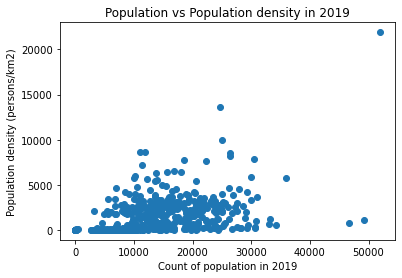

In [16]:
#Looking at the correlation between population and population density:
x_axis = df4["Population_2019"]
y_axis = df4["Population Density 2019 (persons/km2)"]
plt.scatter(x_axis,y_axis)
#plt.plot(x_axis,regress_values,"r-")
#plt.annotate(line_eq,(2500,50),fontsize=10,color="red")
plt.xlabel("Count of population in 2019")
plt.ylabel("Population density (persons/km2)")
plt.title("Population vs Population density in 2019")
plt.show()

As there are a few outliers, we will check the top 10 suburbs with the highest density to ensure the data is relevant.

In [20]:
#Checking the minimum values by sorting the Population 2019 in ascending order:
df4_sort = df4.sort_values(by=["Population Density 2019 (persons/km2)"], ascending = False)
df4_sort.head(10)

6,SA4 code,SA4 name,SA3 code,SA3 name,SA2 code,SA2 name,Population_2018,Population_2019,Natural Increase,Net Internal Migration,Net Overseas Migration,Area(km2),Population Density 2019 (persons/km2)
121,206,Melbourne - Inner,20604,Melbourne City,206041122,Melbourne,49247,51894,235,-1033,3445,2.4,21905.4
116,206,Melbourne - Inner,20604,Melbourne City,206041117,Carlton,23261,24692,52,-651,2030,1.8,13578.2
136,206,Melbourne - Inner,20606,Stonnington - West,206061137,South Yarra - East,24654,25051,147,-433,683,2.5,9951.9
140,206,Melbourne - Inner,20607,Yarra,206071141,Collingwood,10377,10984,88,186,333,1.3,8668.6
141,206,Melbourne - Inner,20607,Yarra,206071142,Fitzroy,11726,11903,57,-155,275,1.4,8637.9
125,206,Melbourne - Inner,20604,Melbourne City,206041126,Southbank,24424,26324,184,1007,709,3.1,8562.6
122,206,Melbourne - Inner,20604,Melbourne City,206041123,North Melbourne,25367,26459,161,-284,1215,3.2,8143.2
132,206,Melbourne - Inner,20605,Port Phillip,206051133,St Kilda,29886,30447,97,-385,849,3.9,7804.9
133,206,Melbourne - Inner,20605,Port Phillip,206051134,St Kilda East,18262,18583,153,-185,353,2.4,7699.6
135,206,Melbourne - Inner,20606,Stonnington - West,206061136,Prahran - Windsor,22040,22234,96,-368,466,2.9,7652.6


We can see the data is relevant as these are the most dense suburbs close to Melbourne CBD.

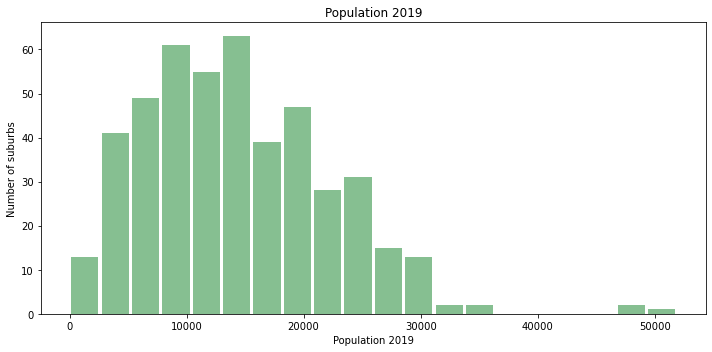

In [21]:
#Visualising the population of all suburbs with an histogram
x = df4.hist(column='Population_2019', bins=20, grid=False, figsize=(10,5), color='#86bf91', zorder=2, rwidth=0.9)
#Titles and axis
plt.title("Population 2019")
plt.ylabel("Number of suburbs")
plt.xlabel("Population 2019")
#Showing the histogram
plt.tight_layout()
plt.show()